In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
def cv_show(img, name='image'):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## 圖像金字塔
* 高斯金字塔
* 拉普拉斯金字塔

### 高斯金字塔
- 向下採樣(縮小)
    - 與高斯內核卷積
    - 去除偶數行和列
- 向上採樣(放大)
    - 每個方向擴大兩倍, 新增的行列用0填充
    - 使用相同的內核與放大後的圖像做卷積, 獲得近似值

In [5]:
path = 'dataset/AM.png'

In [6]:
img = cv2.imread(path)
cv_show(img)
print(img.shape)

(442, 340, 3)


In [7]:
up = cv2.pyrUp(img)
cv_show(up)
print(up.shape)

(884, 680, 3)


In [8]:
down = cv2.pyrDown(img)
cv_show(down)
print(down.shape)

(221, 170, 3)


In [9]:
up2 = cv2.pyrUp(up)
cv_show(up2)
print(up2.shape)

(1768, 1360, 3)


In [10]:
up = cv2.pyrUp(img)
up_down = cv2.pyrDown(up)

res = np.hstack((img, up_down))
cv_show(res)
print(up_down.shape)

(442, 340, 3)


In [11]:
up = cv2.pyrUp(img)
up_down = cv2.pyrDown(up)
cv_show(img - up_down)

### 拉普拉斯金字塔
$L{_i} = G{_i} - PyrUp(PyrDown(G{_i}))$ <br>


In [12]:
down = cv2.pyrDown(img)
down_up = cv2.pyrUp(down)
L_1 = img - down_up
cv_show(L_1)

## 圖像輪廓

#### cv2.findContours(img, mode, method)
mode: 輪廓檢索模式
    * RETR_EXTERNAL: 指檢索最外面的輪廓
    * RETR_LIST: 檢索所有的輪廓, 並將其保存到一條LIST內
    * RETR_CCOMP: 檢索所有的輪廓, 並將他們組織為兩層, 頂層是個部份的外部邊界, 第二層是空洞的邊界
    * RETR_TREE: 檢索所有的輪廓, 並重構嵌套輪廓的整個層次 <----推薦
method: 輪廓逼近方式
    * CHAIN_APPROX_NONE: 以Freeman鍊碼的方式輸出輪廓, 所有其他方法輸出多邊形(頂點的序列)
    * CHAIN_APPROX_SIMPLE: 壓縮水平, 垂直和斜的部分, 也就是函數只保留他們的終點部分

In [13]:
img = cv2.imread('dataset/car.png') # read img
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 轉灰階
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY) # 二值化
cv_show(thresh)

In [14]:
# binary, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

#### 繪製輪廓
* 備註: 輪廓會畫上原始圖片, 所以先.copy()比較好

In [15]:
draw_img = img.copy()
res = cv2.drawContours(draw_img, contours, -1, (0, 0, 255), 2) # 繪製圖像, 輪廓, 輪廓索引, 顏色模式(B, G, R), 線條厚度
cv_show(res)

In [16]:
# e.g2
img = cv2.imread('dataset/contours.png') # read img
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 轉灰階
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY) # 二值化
cv_show(thresh)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print(len(contours)) # 有幾個輪廓

draw_img1 = img.copy()
draw_img2 = img.copy()
draw_img3 = img.copy()
# -1為全部
res1 = cv2.drawContours(draw_img1, contours, -1, (0, 0, 255), 2) # 繪製圖像, 輪廓, 輪廓索引, 顏色模式(B, G, R), 線條厚度
res2 = cv2.drawContours(draw_img2, contours, 1, (0, 0, 255), 2) # 繪製圖像, 輪廓, 輪廓索引, 顏色模式(B, G, R), 線條厚度
res3 = cv2.drawContours(draw_img3, contours, 3, (0, 0, 255), 2) # 繪製圖像, 輪廓, 輪廓索引, 顏色模式(B, G, R), 線條厚度
res = np.hstack((res1, res2, res3))
cv_show(res)

11


#### 輪廓特徵

In [17]:
cnt = contours[0]

In [18]:
# 面積
cv2.contourArea(cnt)

8500.5

In [19]:
# 周長, true表示閉合的
cv2.arcLength(cnt, True)

437.9482651948929

#### 輪廓近似

In [20]:
img = cv2.imread('dataset/contours2.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt =  contours[0]

draw_img = img.copy()
res = cv2.drawContours(draw_img, [cnt], -1, (0, 0, 255), 2)

cv_show(res)

In [21]:
epsilon = 0.1 * cv2.arcLength(cnt, True) # 用周長百分比, 越小越像
approx = cv2.approxPolyDP(cnt, epsilon, True)

draw_img = img.copy()
res = cv2.drawContours(draw_img, [approx], -1, (0, 0, 255), 2)
cv_show(res)

#### 邊界矩形

In [22]:
img = cv2.imread('dataset/contours.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt =  contours[0]

x, y, w, h = cv2.boundingRect(cnt)
img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
cv_show(img)

In [23]:
area = cv2.contourArea(cnt)
x, y, w, h = cv2.boundingRect(cnt)
rect_area = w * h
extent = float(area)  / rect_area
print(f'輪廓面積與邊界矩形比: {extent}')

輪廓面積與邊界矩形比: 0.5154317244724715


#### 外接圓

In [24]:
(x, y), radius = cv2.minEnclosingCircle(cnt)
center = (int(x), int(y))
radius = int(radius)
img = cv2.circle(img, center, radius, (0, 255, 0), 2)
cv_show(img)

#### 模板匹配
計算模板與圖像的差別程度,<br>
假設原圖形是 A * B, 模板是 a * b, 則輸出矩陣是(A-a+1) * (B-b+1)


In [47]:
# 模板匹配
img = cv2.imread('dataset/lena.jpg', 0)
template = cv2.imread('dataset/face.jpg', 0)
h, w = template.shape[:2]

In [48]:
img.shape

(263, 263)

In [49]:
template.shape

(110, 85)

* TM_SQDIFF: 計算平方不同, 計算出來的值越小, 越相關
* TM_CCORR: 計算相關性, 計算出來的值越大, 越相關
* TM_CCOEFF: 計算相關係數, 計算出來的值越大, 越相關
* TM_SQDIFF_NORMED: 計算歸一化平方不同, 計算出來的值越接近0, 越相關
* TM_CCORR_NORMED: 計算歸一化相關性, 計算出來的值越接近1, 越相關
* TM_CCOEFF_NORMED: 計算歸一化相關係數, 計算出來的值越接近1, 越相關

[MORE INFO](https://docs.opencv.org/3.4/de/da9/tutorial_template_matching.html)

In [50]:
method = [
    'cv2.TM_SQDIFF',
    'cv2.TM_CCORR',
    'cv2.TM_CCOEFF',
    'cv2.TM_SQDIFF_NORMED',
    'cv2.TM_CCORR_NORMED',
    'cv2.TM_CCOEFF_NORMED'
]

In [51]:
res = cv2.matchTemplate(img, template, 1) # 1就是 TM_SQDIFF
res.shape

(154, 179)

In [52]:
# 最大最小值與其座標位置
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

In [53]:
min_val

0.0002352227020310238

In [54]:
max_val

0.5173118114471436

In [55]:
min_loc

(107, 89)

In [56]:
max_loc

(39, 153)

In [57]:
method

['cv2.TM_SQDIFF',
 'cv2.TM_CCORR',
 'cv2.TM_CCOEFF',
 'cv2.TM_SQDIFF_NORMED',
 'cv2.TM_CCORR_NORMED',
 'cv2.TM_CCOEFF_NORMED']

0


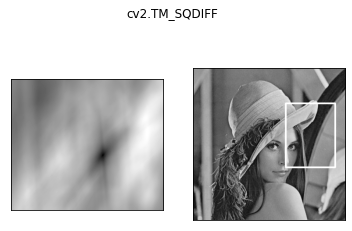

2


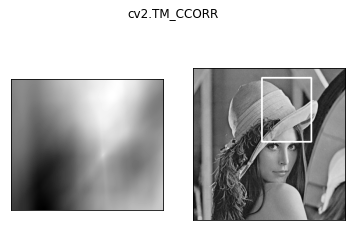

4


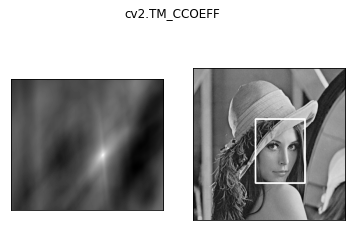

1


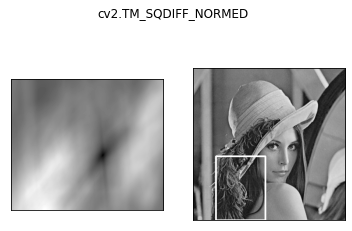

3


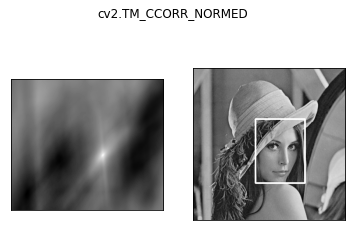

5


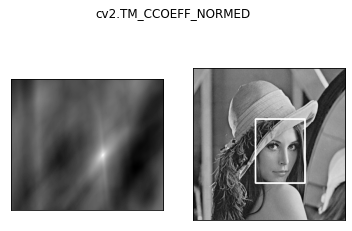

In [58]:
# 比較不同方法的差異
for m in method:
    img2 = img.copy()
    mt = eval(m)
    print(mt)
    res = cv2.matchTemplate(img, template, mt) # m格式不是字串
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # 如果是TM_SQDIFF 或 TM_SQDIFF_NORMED, 取最小值
    if m in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    # 畫矩形
    cv2.rectangle(img2, top_left, bottom_right, 255, 2)
    
    plt.subplot(121)
    plt.imshow(res, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(122)
    plt.imshow(img2, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.suptitle(m)
    plt.show()

#### 匹配多個對象

In [59]:
img_rgb = cv2.imread('dataset/mario.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('dataset/mario_coin.jpg', 0)
h, w = template.shape[:2]

In [77]:
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where(res >= threshold)
for pt in zip(*loc[::-1]):
    bottom_right = (pt[0] + w, pt[1] + h)
    cv2.rectangle(img_rgb, pt, bottom_right, (0, 0, 255), 2)

cv_show(img_rgb)